# Phone Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datasets_path = './datasets'

# Load the dataset
df = pd.read_csv(f'{datasets_path}/phone.csv')

# Display the first few rows and summary information
print(df.head())
print(df.info())
print(df.describe())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [3]:
print("Zeros in sc_w:", (df['sc_w'] == 0).sum())
print("Zeros in px_height:", (df['px_height'] == 0).sum())
print("Zeros in sc_h:", (df['sc_h'] == 0).sum())

Zeros in sc_w: 180
Zeros in px_height: 2
Zeros in sc_h: 0


## Plots

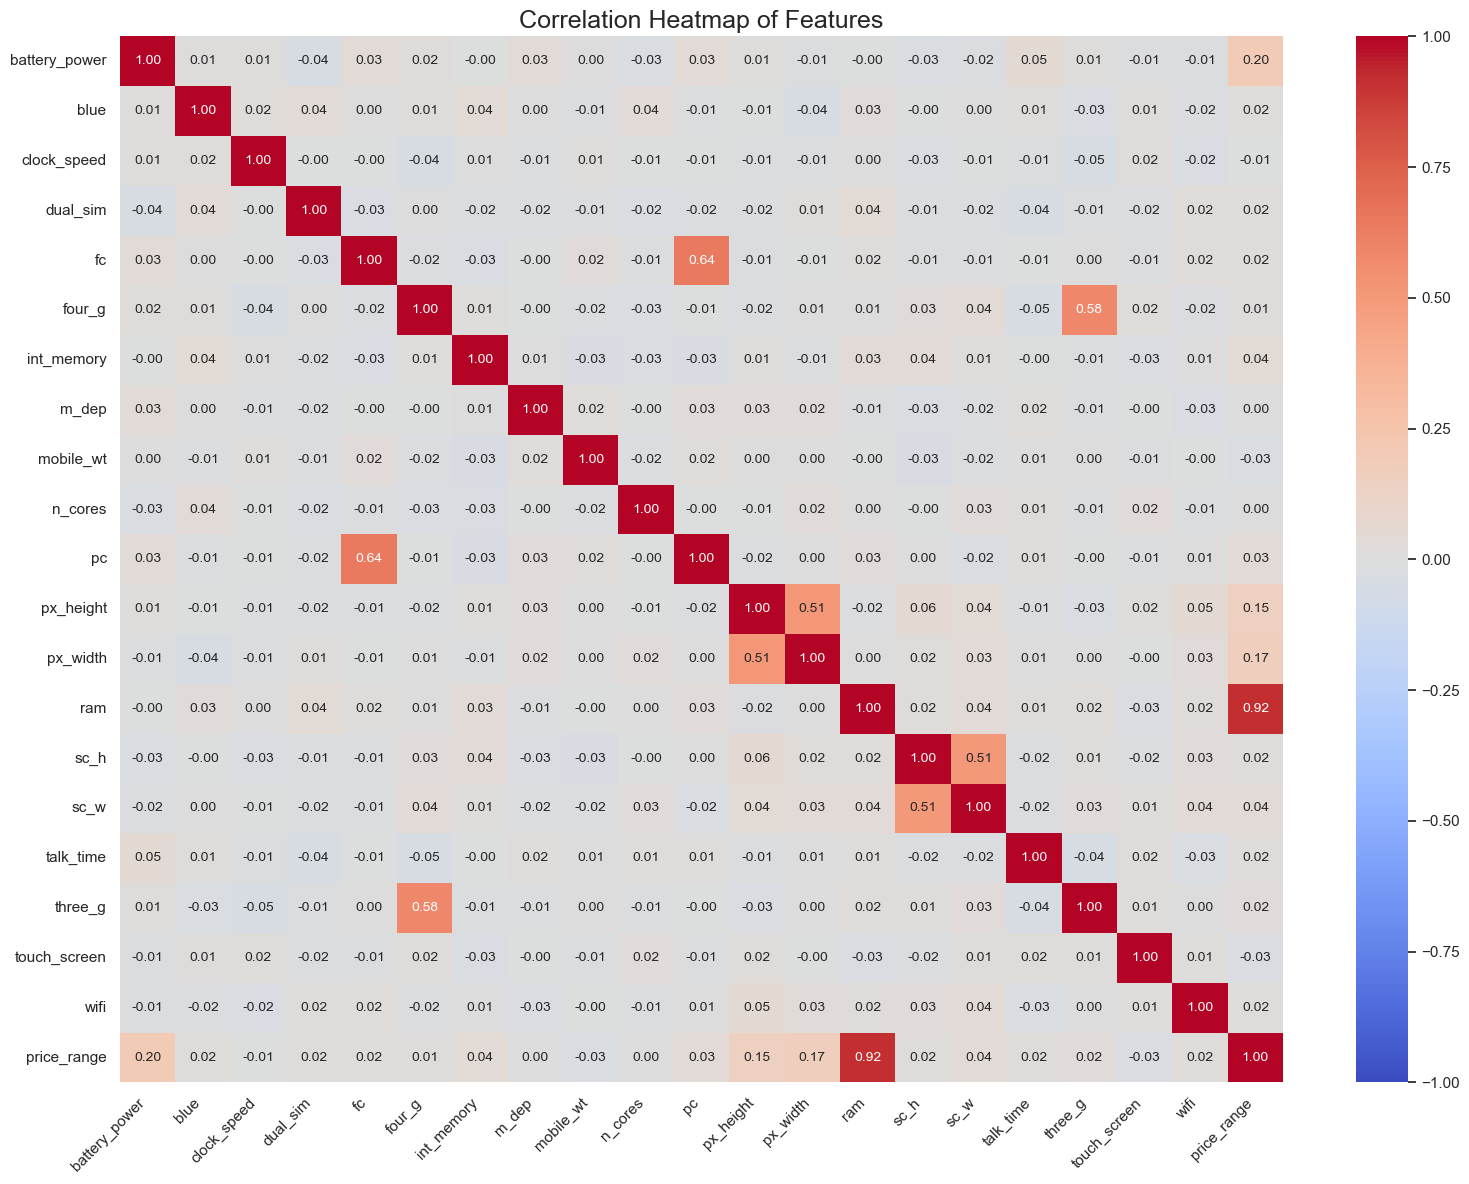

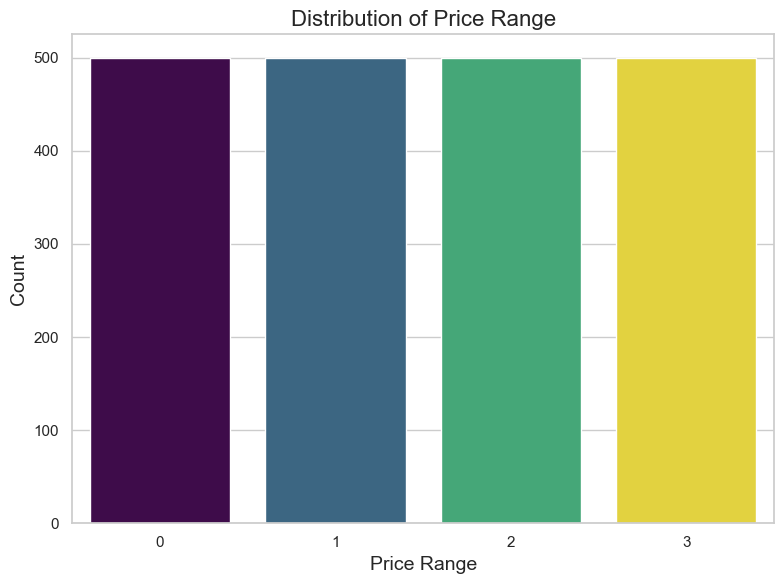

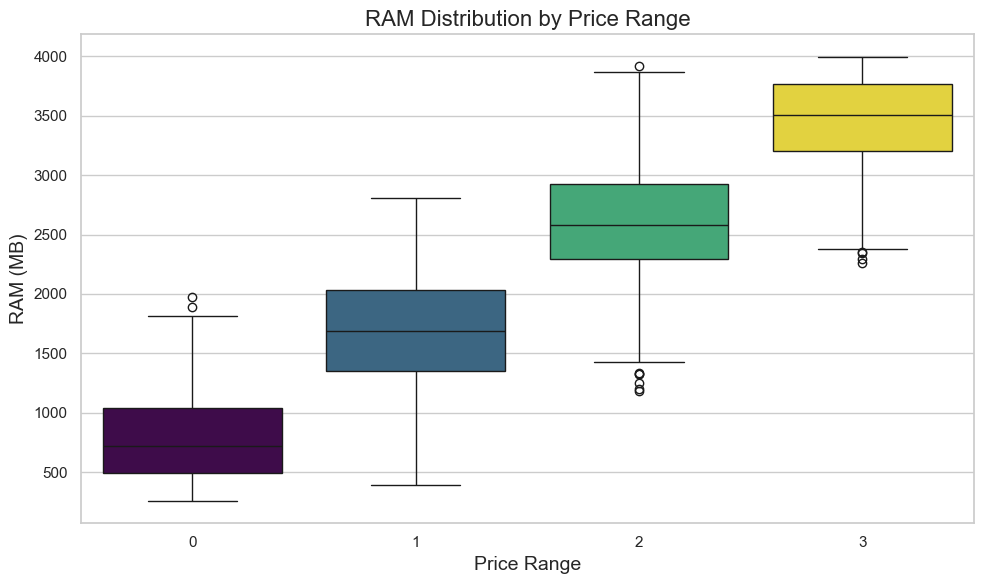

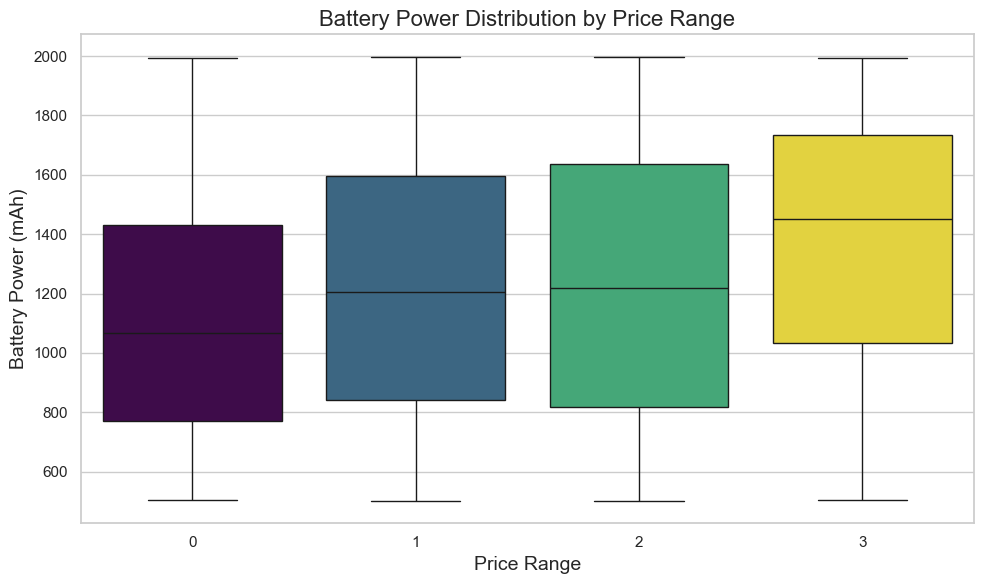

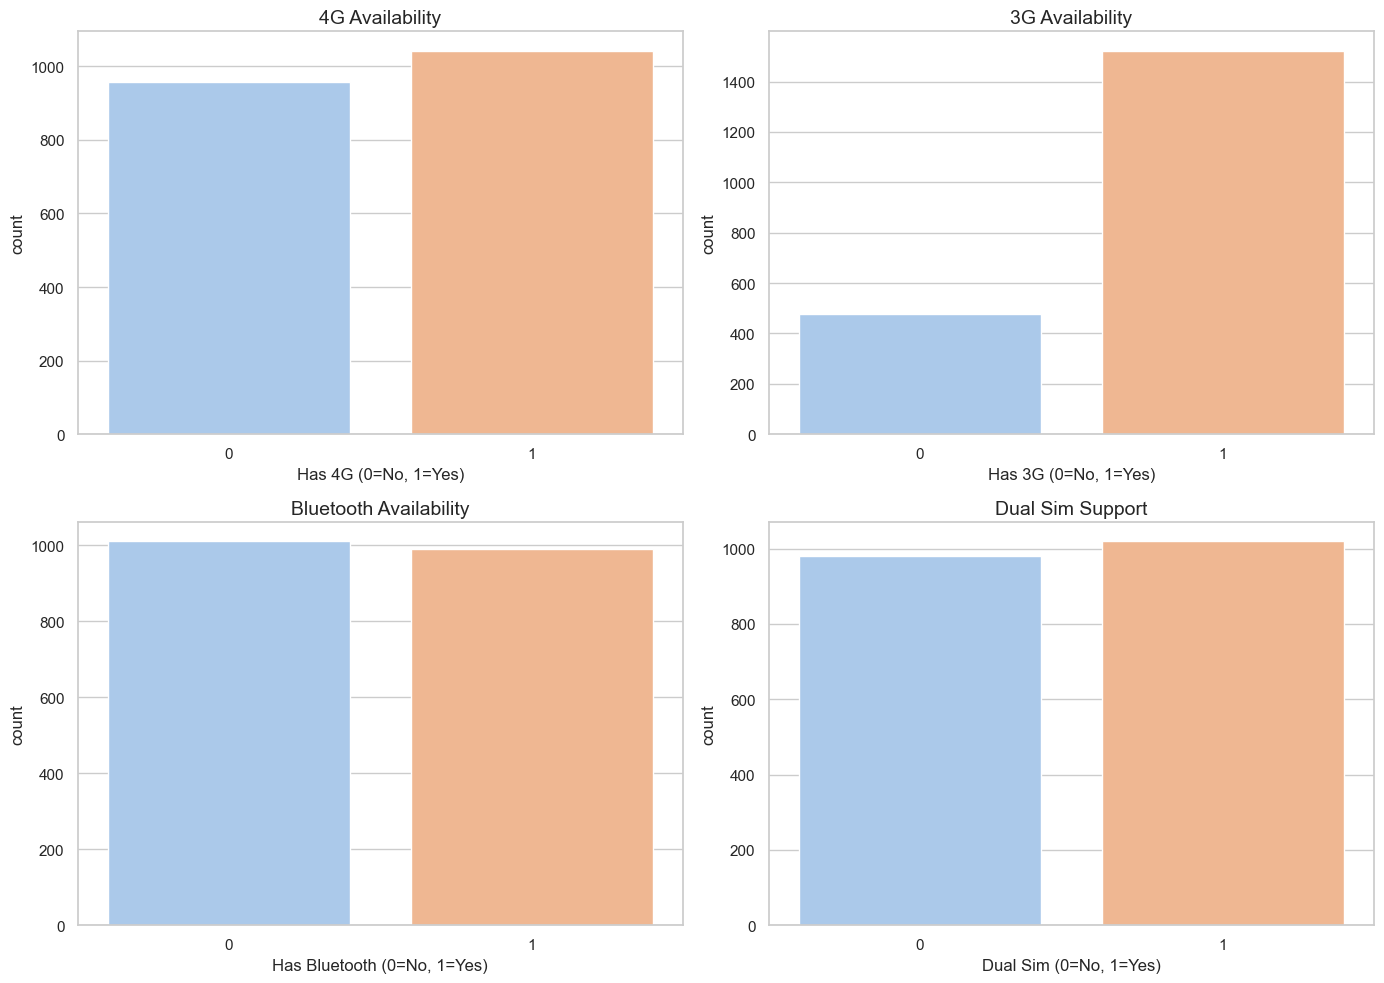

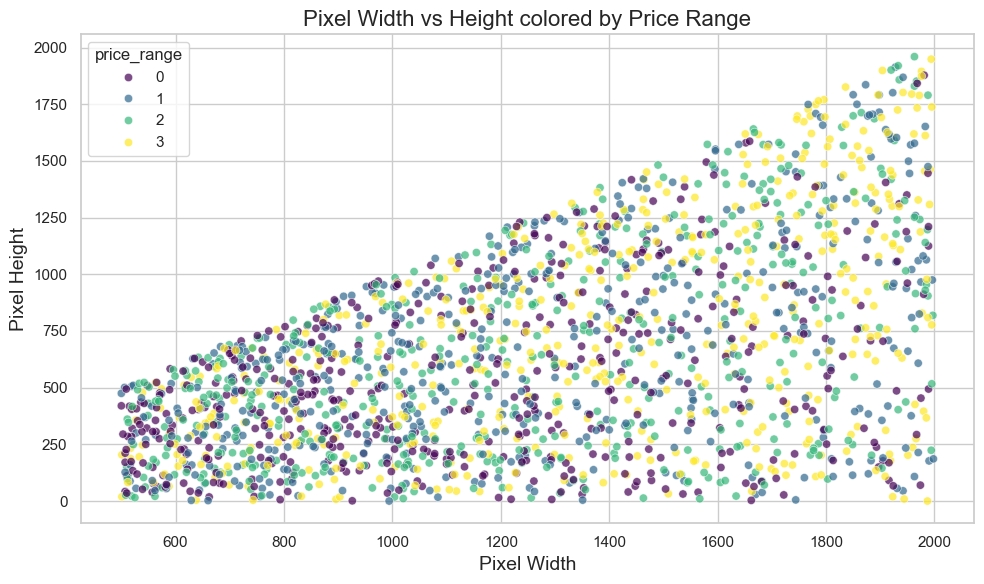

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set plotting style
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# 1. Correlation Heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    annot_kws={"size": 10}
)
plt.title('Correlation Heatmap of Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()

# 2. Price Range Distribution
plt.figure(figsize=(8, 6))
sns.countplot(
    x='price_range',
    hue='price_range',
    data=df,
    palette='viridis',
    legend=False
)
plt.title('Distribution of Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# 3. RAM vs Price Range
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='price_range',
    y='ram',
    hue='price_range',
    data=df,
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('RAM Distribution by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('RAM (MB)', fontsize=14)
plt.tight_layout()
plt.show()

# 4. Battery Power vs Price Range
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='price_range',
    y='battery_power',
    hue='price_range',
    data=df,
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('Battery Power Distribution by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Battery Power (mAh)', fontsize=14)
plt.tight_layout()
plt.show()

# 5. Grid of Categorical/Ordinal Plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(
    x='four_g',
    hue='four_g',
    data=df,
    palette='pastel',
    legend=False,
    ax=axes[0, 0]
)
axes[0, 0].set_title('4G Availability', fontsize=14)
axes[0, 0].set_xlabel('Has 4G (0=No, 1=Yes)')

sns.countplot(
    x='three_g',
    hue='three_g',
    data=df,
    palette='pastel',
    legend=False,
    ax=axes[0, 1]
)
axes[0, 1].set_title('3G Availability', fontsize=14)
axes[0, 1].set_xlabel('Has 3G (0=No, 1=Yes)')

sns.countplot(
    x='blue',
    hue='blue',
    data=df,
    palette='pastel',
    legend=False,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Bluetooth Availability', fontsize=14)
axes[1, 0].set_xlabel('Has Bluetooth (0=No, 1=Yes)')

sns.countplot(
    x='dual_sim',
    hue='dual_sim',
    data=df,
    palette='pastel',
    legend=False,
    ax=axes[1, 1]
)
axes[1, 1].set_title('Dual Sim Support', fontsize=14)
axes[1, 1].set_xlabel('Dual Sim (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

# 6. Screen Dimensions Scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='px_width',
    y='px_height',
    hue='price_range',
    data=df,
    palette='viridis',
    alpha=0.7
)
plt.title('Pixel Width vs Height colored by Price Range', fontsize=16)
plt.xlabel('Pixel Width', fontsize=14)
plt.ylabel('Pixel Height', fontsize=14)
plt.tight_layout()
plt.show()


# Bank Churn Dataset

In [7]:
df = pd.read_csv(f'{datasets_path}/bank_churn.csv')
print("First 5 rows:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())
print("\nDuplicates:")
print(df.duplicated().sum())

First 5 rows:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 colu

## Plots

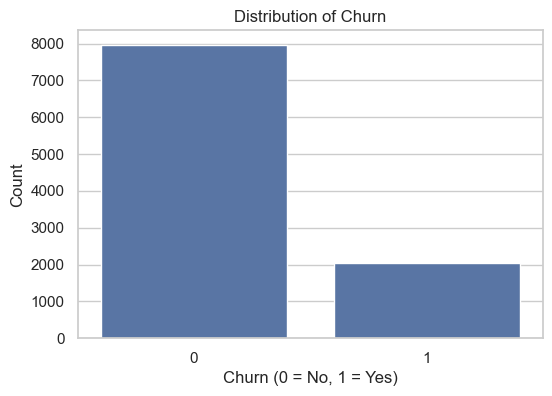

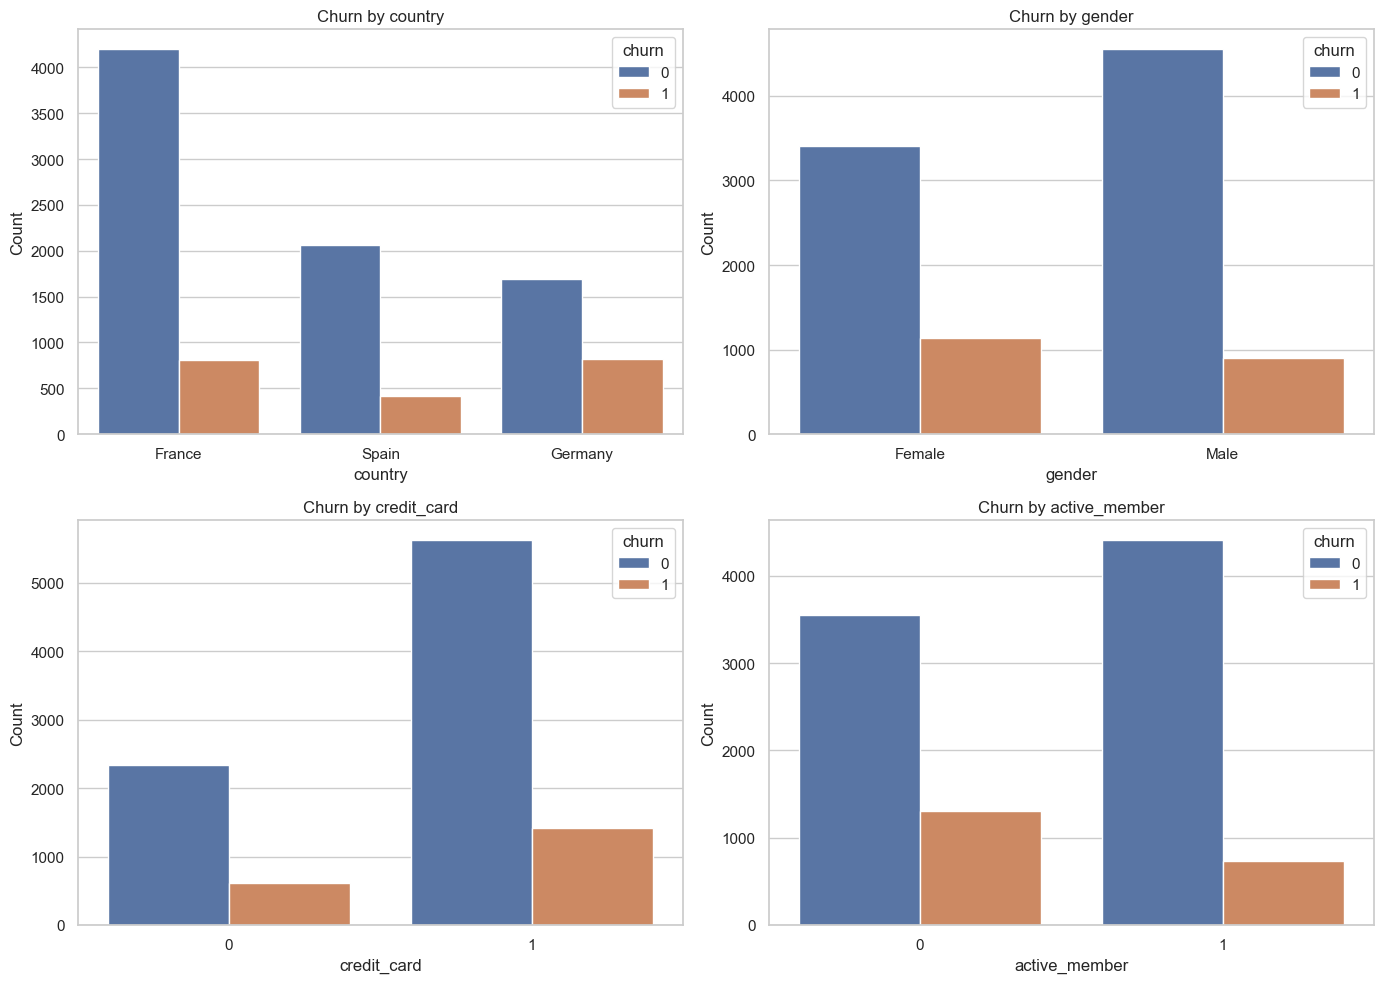

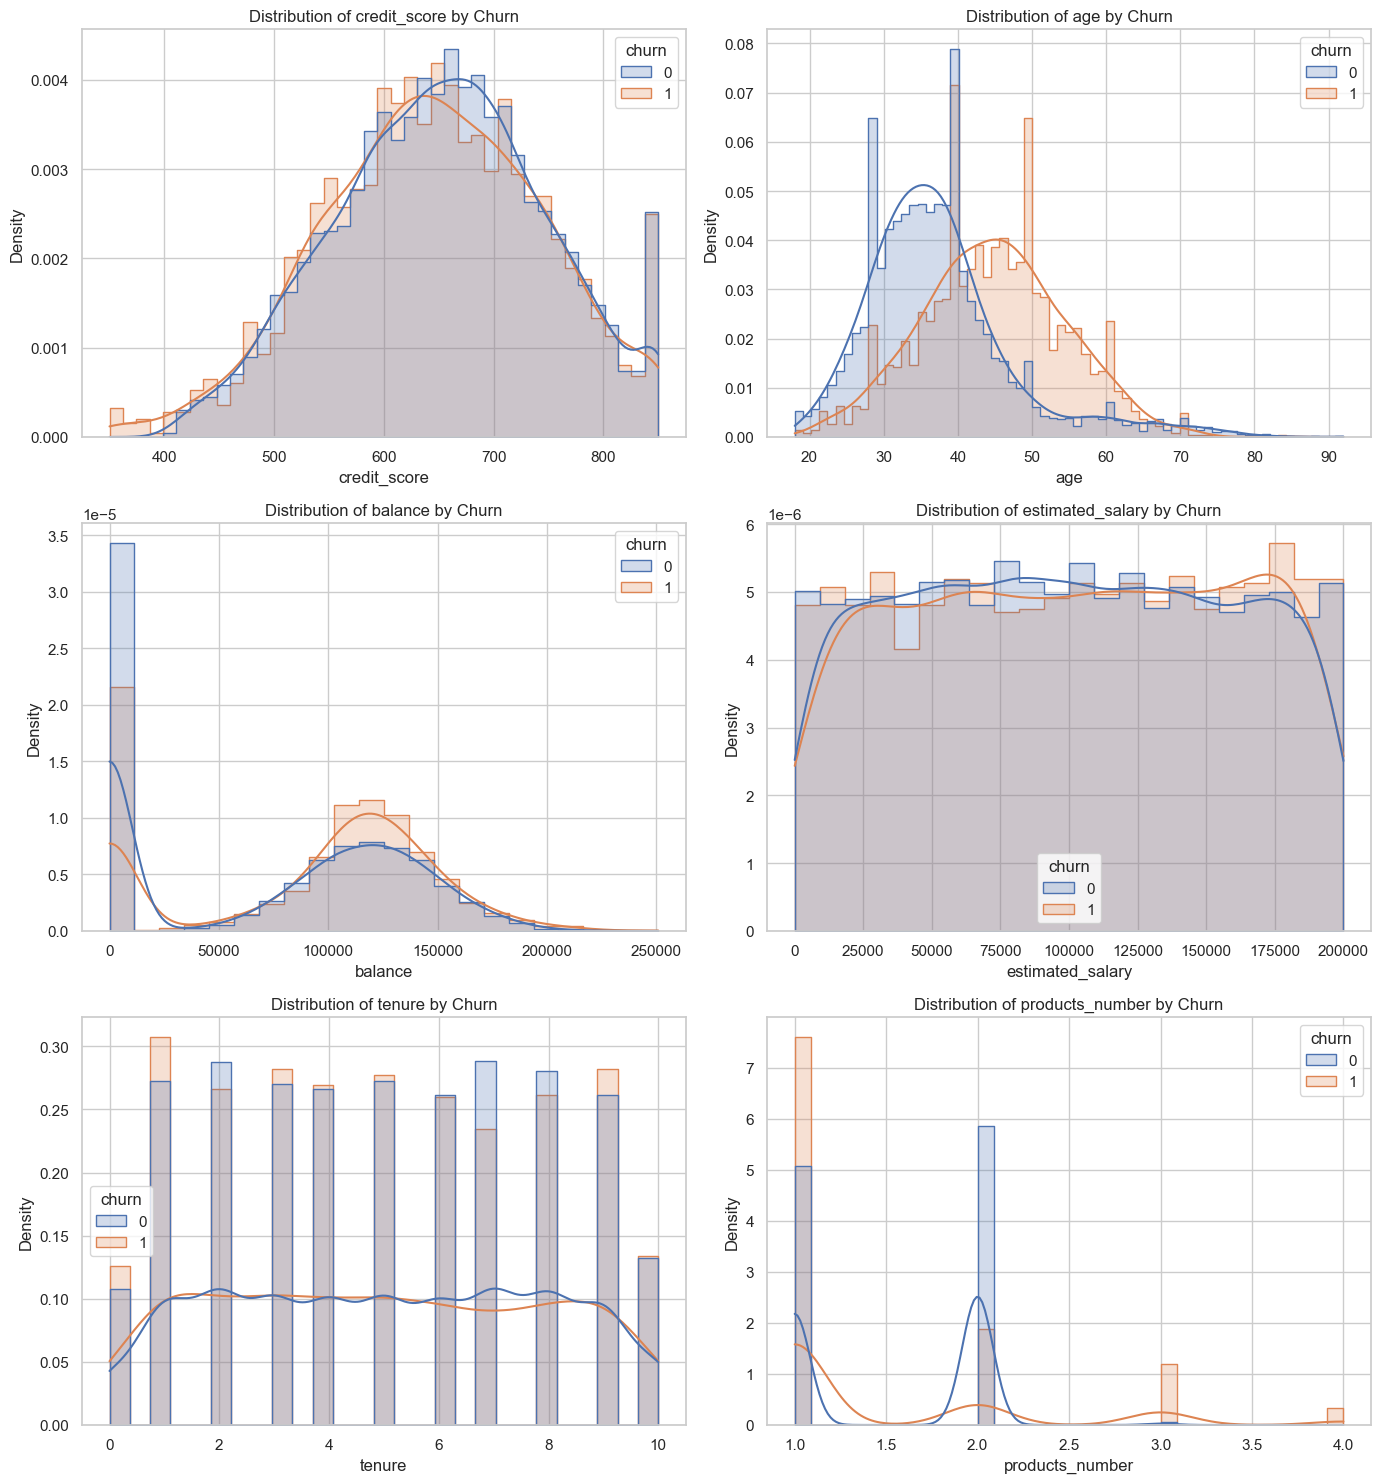

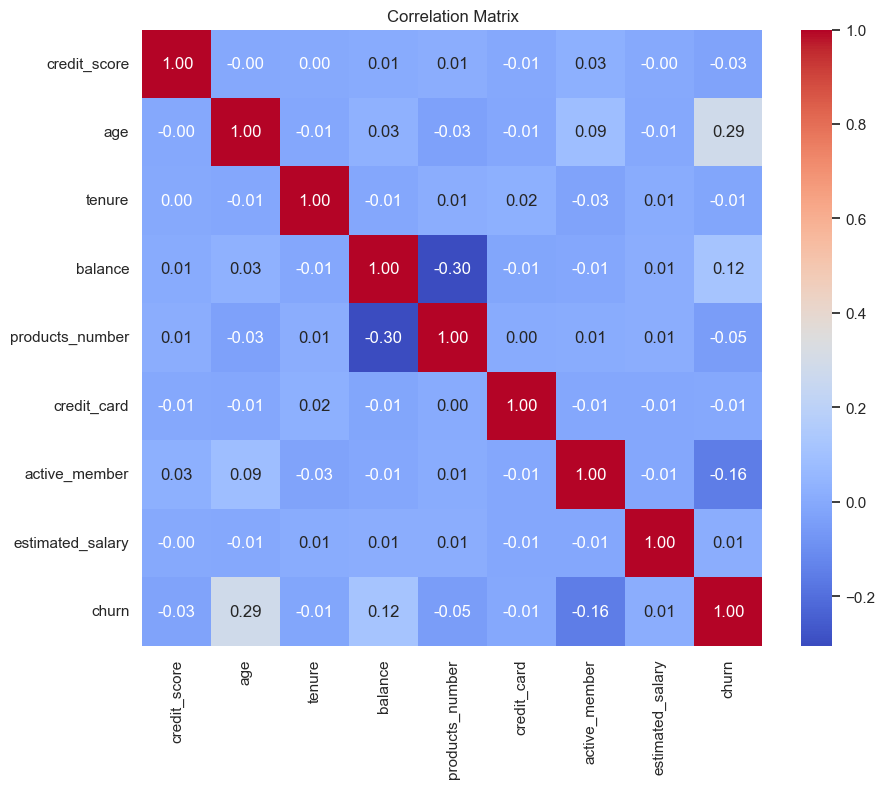

In [8]:
# Set style
sns.set(style="whitegrid")

# 1. Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 2. Categorical Features Analysis
categorical_cols = ['country', 'gender', 'credit_card', 'active_member']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='churn', data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Churn by {col}')
    axes[i//2, i%2].set_ylabel('Count')

plt.tight_layout()
plt.show()


# 3. Numerical Features Analysis
numerical_cols = ['credit_score', 'age', 'balance', 'estimated_salary', 'tenure', 'products_number']
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue='churn', kde=True, element="step", stat="density", common_norm=False, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col} by Churn')

plt.tight_layout()
plt.show()

# 4. Correlation Matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop('customer_id', axis=1) # Exclude customer_id
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Drug Consumption Dataset

In [9]:
df = pd.read_csv(f'{datasets_path}/drug_consumption.csv')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| ID   | Age      | Gender   | Education   | Country   | Ethnicity   | Nscore   | Escore   | Oscore   | Ascore   | Cscore   | Impulsive   | SS       | Alcohol   | Amphet   | Amyl   | Benzos   | Caff   | Cannabis   | Choc   | Coke   | Crack   | Ecstasy   | Heroin   | Ketamine   | Legalh   | LSD   | Meth   | Mushrooms   | Nicotine   | Semer   | VSA   |
|:-----|:---------|:---------|:------------|:----------|:------------|:---------|:---------|:---------|:---------|:---------|:------------|:---------|:----------|:---------|:-------|:---------|:-------|:-----------|:-------|:-------|:--------|:----------|:---------|:-----------|:---------|:------|:-------|:------------|:-----------|:--------|:------|
| 1    | 0.49788  | 0.48246  | -0.05921    | 0.96082   | 0.126       | 0.31287  | -0.57545 | -0.58331 | -0.91699 | -0.00665 | -0.21712    | -1.18084 | CL5       | CL2      | CL0    | CL2      | CL6    | CL0        | CL5    | CL0    | CL0     | CL0       | CL0      | CL0        | CL0      | CL0

### Missing Values

In [10]:
print(df.isnull().sum())

drug_columns = df.columns[13:]
for col in drug_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64
Unique values in Alcohol: ['CL5' 'CL6' 'CL4' 'CL2' 'CL1' 'CL0' 'CL3']
Unique values in Amphet: ['CL2' 'CL0' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6']
Unique values in Amyl: ['CL0' 'CL2' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6']
Unique values in Benzos: ['CL2' 'CL0' 'CL3' 'CL1' 'CL4' 'CL5' 'CL6']
Unique values in Caff: ['CL6' 'CL5' 'CL4' 'CL3' 'CL0' 'CL1' 'CL2']
Unique values in Cannabis: ['CL0' 'CL4' 'CL3' 'CL2' 'CL1' 'CL6' 'CL5']
Unique values in Choc: ['CL5' 'CL6' 'CL4' 'CL0' 'CL3' 'CL2' 'CL1']
Unique values in Coke: ['CL

## Plots

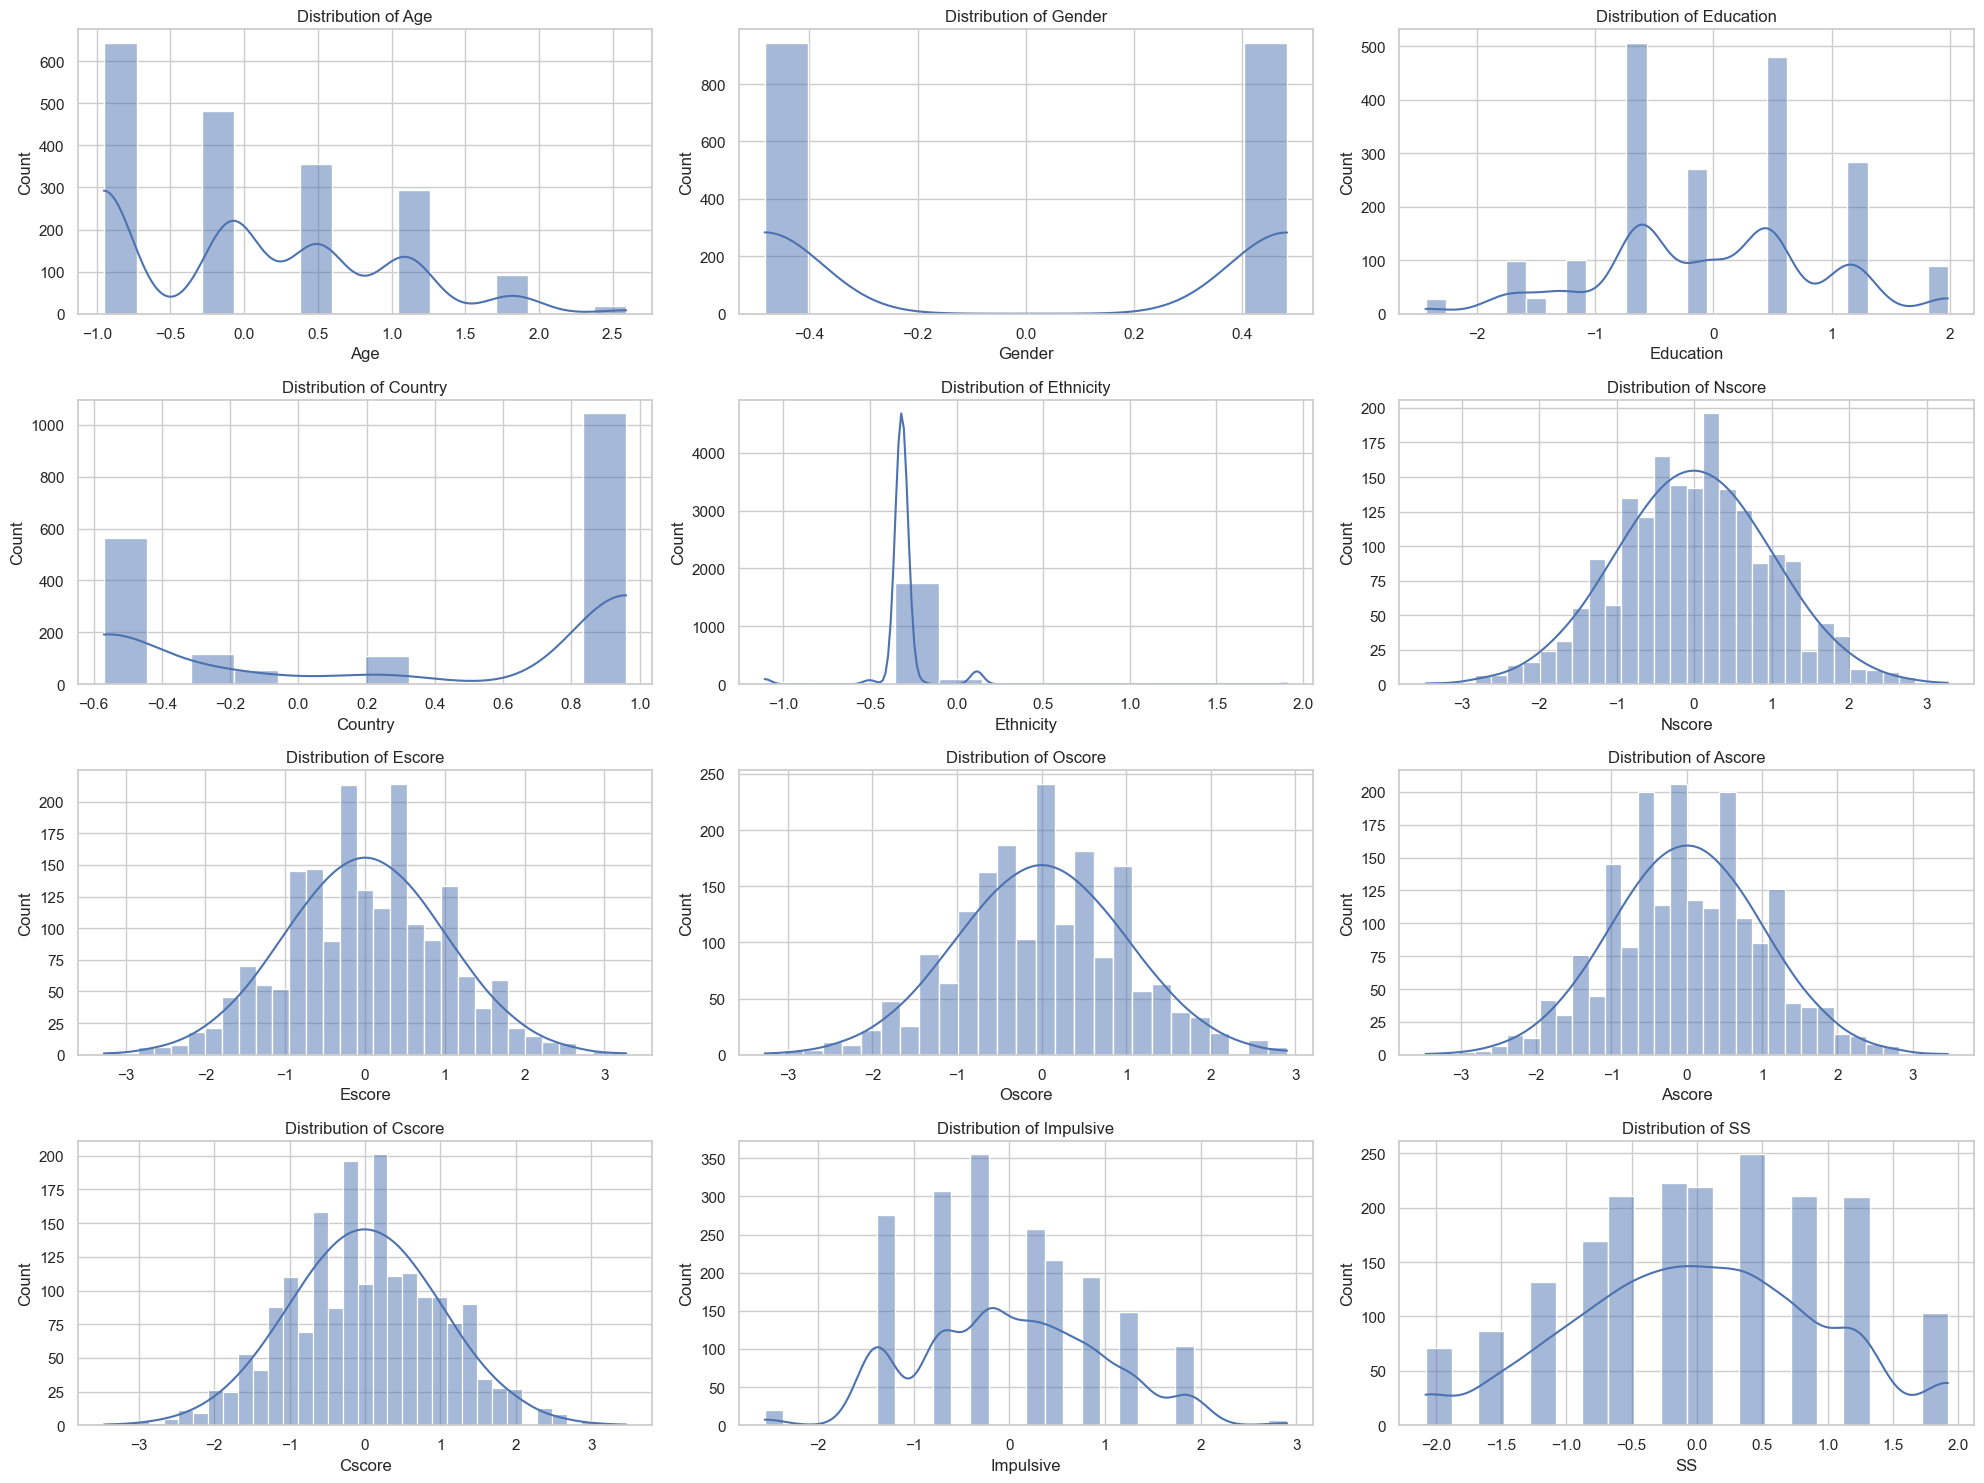

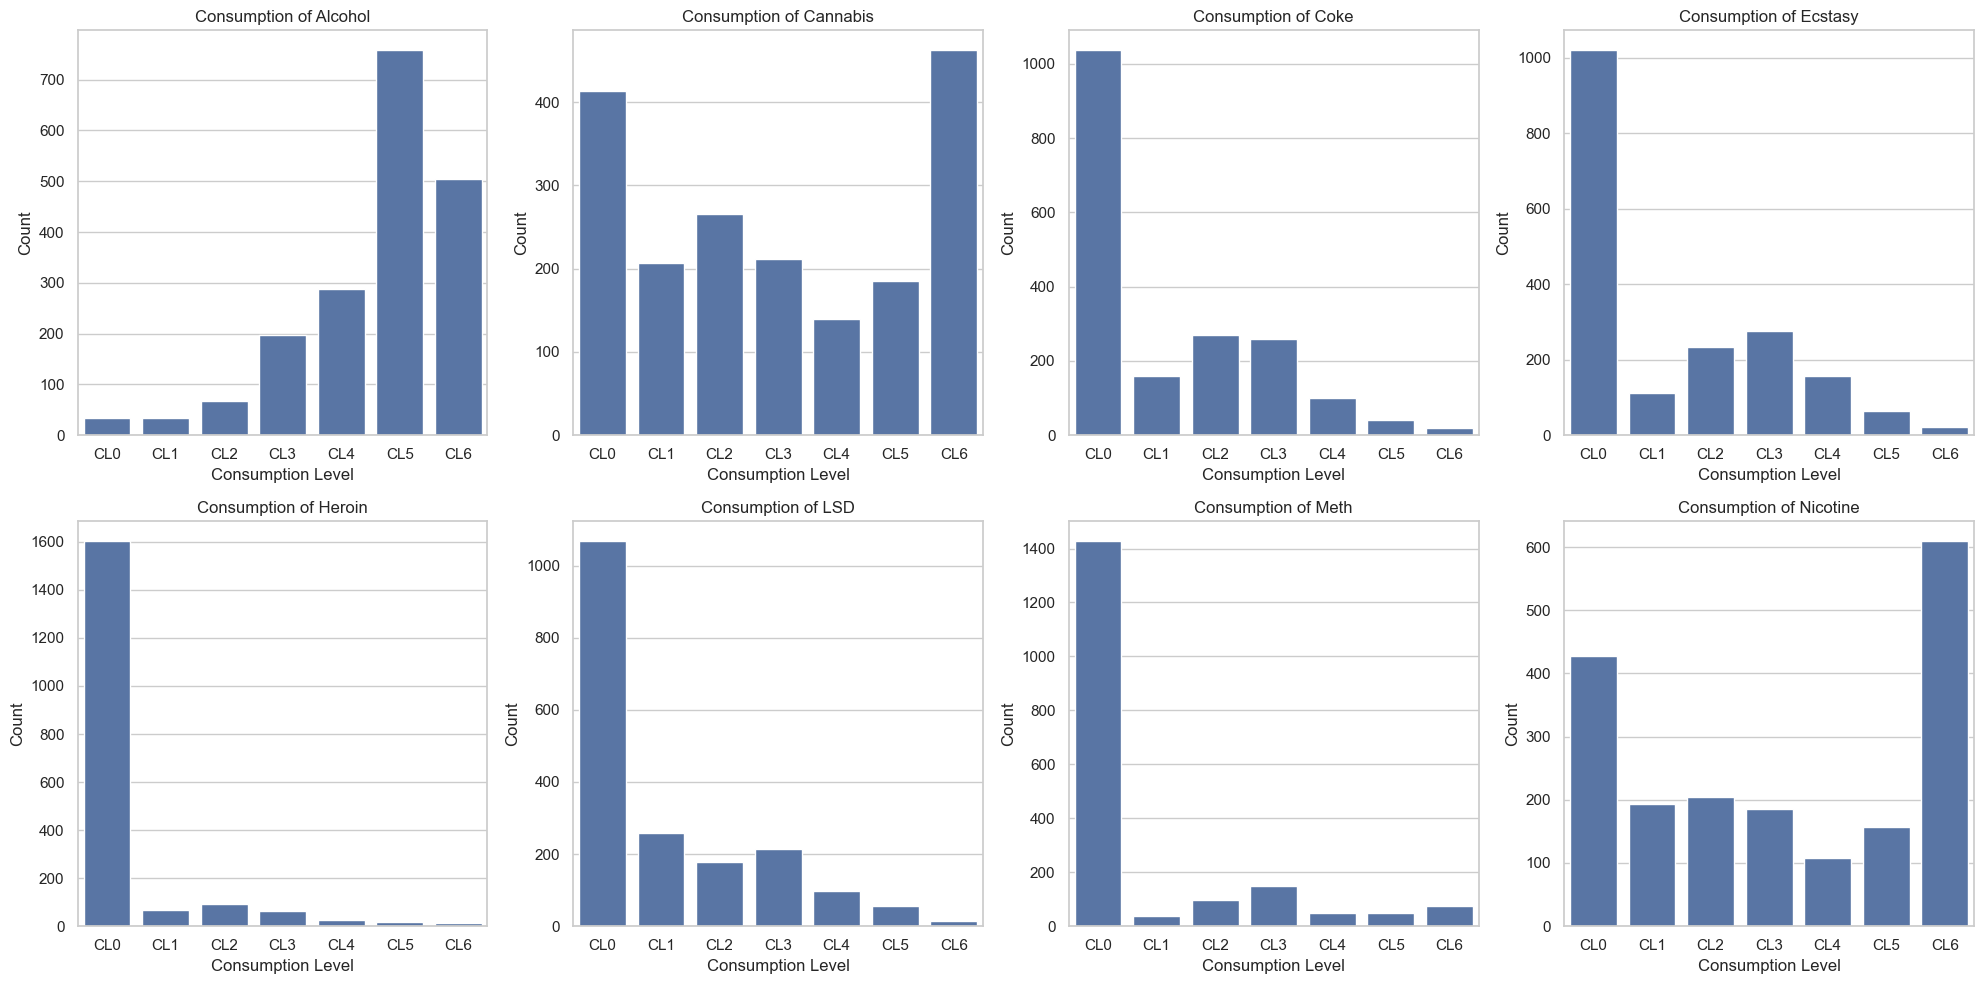

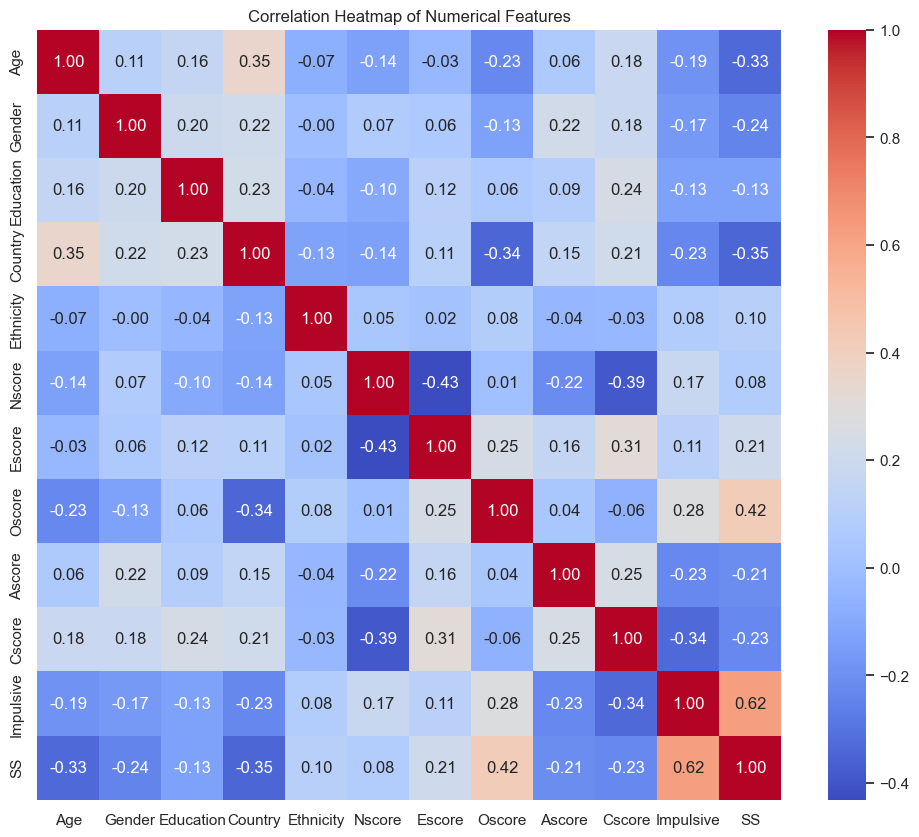

In [ ]:
sns.set(style="whitegrid")

# 1. Visualize distributions of numerical/demographic features
numerical_cols = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 2. Visualize distributions of selected drug consumption levels
selected_drugs = ['Alcohol', 'Cannabis', 'Coke', 'Ecstasy', 'Heroin', 'LSD', 'Meth', 'Nicotine']
plt.figure(figsize=(20, 10))
for i, col in enumerate(selected_drugs):
    plt.subplot(2, 4, i + 1)
    sns.countplot(x=col, data=df, order=['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
    plt.title(f'Consumption of {col}')
    plt.xlabel('Consumption Level')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Heatmap of correlations between personality and drugs

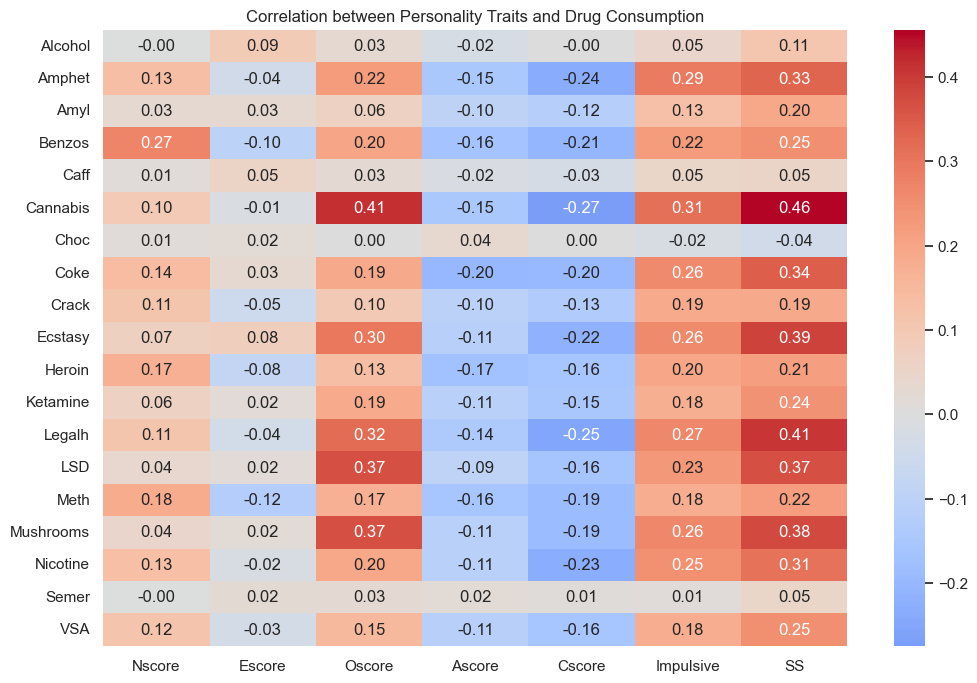

In [12]:
mapping = {
    'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3,
    'CL4': 4, 'CL5': 5, 'CL6': 6
}

df_num = df.copy()

drug_cols = df.columns[13:]
for col in drug_cols:
    df_num[col] = df_num[col].map(mapping)

# Calculate correlation between personality traits and drug usage
personality_cols = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
drug_correlations = df_num[personality_cols + list(drug_cols)].corr().loc[list(drug_cols), personality_cols]

plt.figure(figsize=(12, 8))
sns.heatmap(drug_correlations, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation between Personality Traits and Drug Consumption')
plt.show()

## Correlation between Age and Drug Consumption

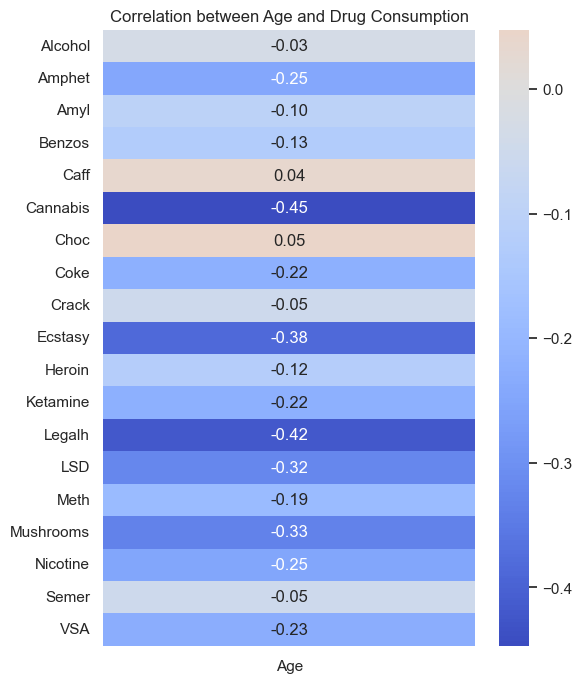

In [13]:
age_drug_corr = df_num[['Age'] + list(drug_cols)].corr().loc[list(drug_cols), ['Age']]

plt.figure(figsize=(6, 8))
sns.heatmap(age_drug_corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation between Age and Drug Consumption')
plt.show()

In [14]:
print(df['Semer'].value_counts())

Semer
CL0    1877
CL2       3
CL3       2
CL1       2
CL4       1
Name: count, dtype: int64


# Diabetes Dataset

In [15]:
df = pd.read_csv(f'{datasets_path}/diabetes.csv')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| Age   | Sex   | HighChol   | CholCheck   | BMI   | Smoker   | HeartDiseaseorAttack   | PhysActivity   | Fruits   | Veggies   | HvyAlcoholConsump   | GenHlth   | MentHlth   | PhysHlth   | DiffWalk   | Stroke   | HighBP   | Diabetes   |
|:------|:------|:-----------|:------------|:------|:---------|:-----------------------|:---------------|:---------|:----------|:--------------------|:----------|:-----------|:-----------|:-----------|:---------|:---------|:-----------|
| 4     | 1     | 0          | 1           | 26    | 0        | 0                      | 1              | 0        | 1         | 0                   | 3         | 5          | 30         | 0          | 0        | 1        | 0          |
| 12    | 1     | 1          | 1           | 26    | 1        | 0                      | 0              | 1        | 0         | 0                   | 3         | 0          | 0          | 0          | 1        | 1        | 0          |
| 13    | 1     | 0          | 1           | 26    |

## Target Dsitribution

Number of duplicate rows: 6672
Missing values per column:
Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


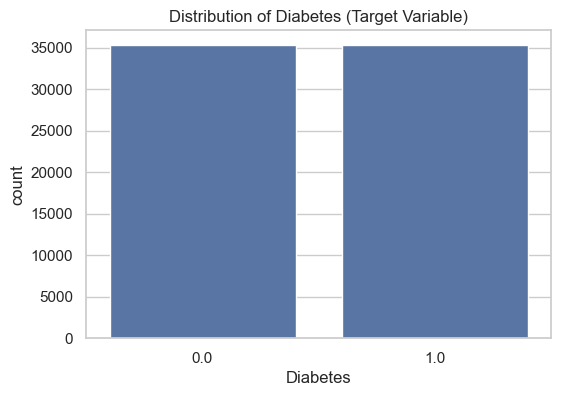

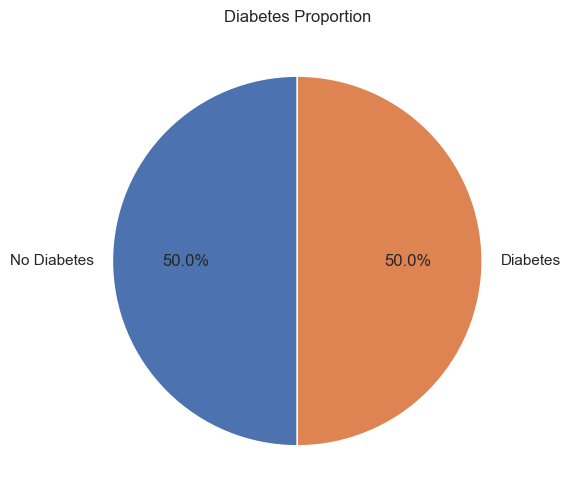

In [16]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes', data=df)
plt.title('Distribution of Diabetes (Target Variable)')
plt.show()

# Pie chart for target variable
plt.figure(figsize=(6, 6))
df['Diabetes'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No Diabetes', 'Diabetes'])
plt.title('Diabetes Proportion')
plt.ylabel('')
plt.show()

## Plots

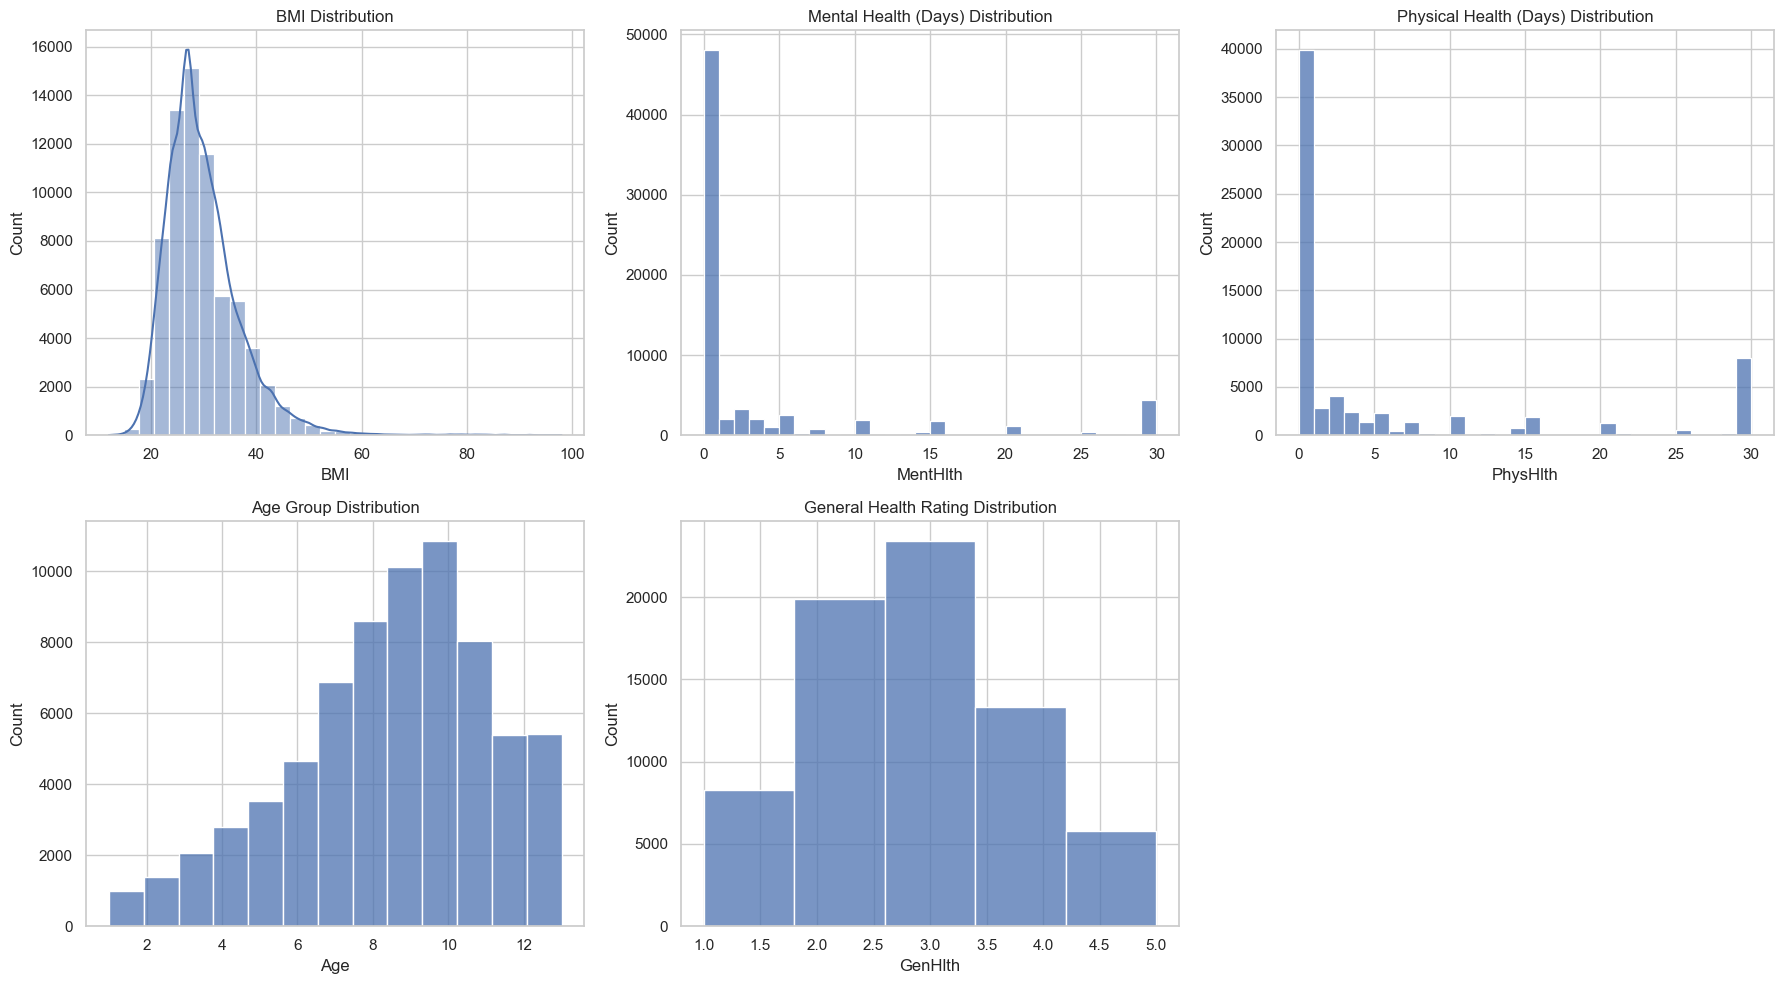

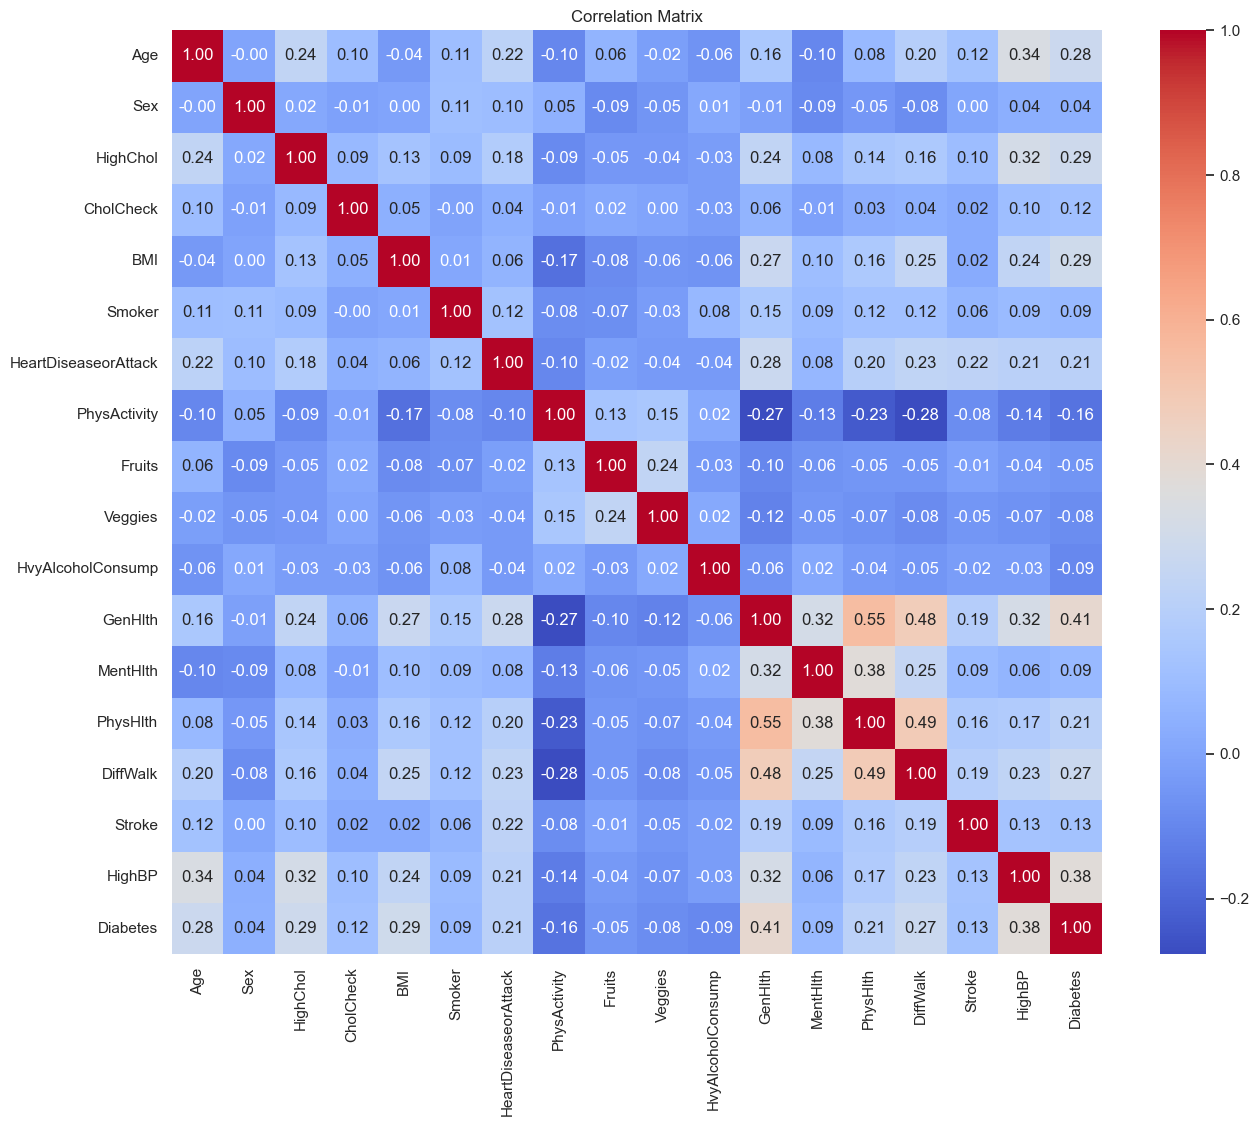

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(df['BMI'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('BMI Distribution')

sns.histplot(df['MentHlth'], bins=30, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Mental Health (Days) Distribution')

sns.histplot(df['PhysHlth'], bins=30, kde=False, ax=axes[0, 2])
axes[0, 2].set_title('Physical Health (Days) Distribution')

sns.histplot(df['Age'], bins=13, kde=False, ax=axes[1, 0]) # Assuming 13 age categories
axes[1, 0].set_title('Age Group Distribution')

sns.histplot(df['GenHlth'], bins=5, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('General Health Rating Distribution')

# Remove the empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Correlation Matrix
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Comparative Analysis

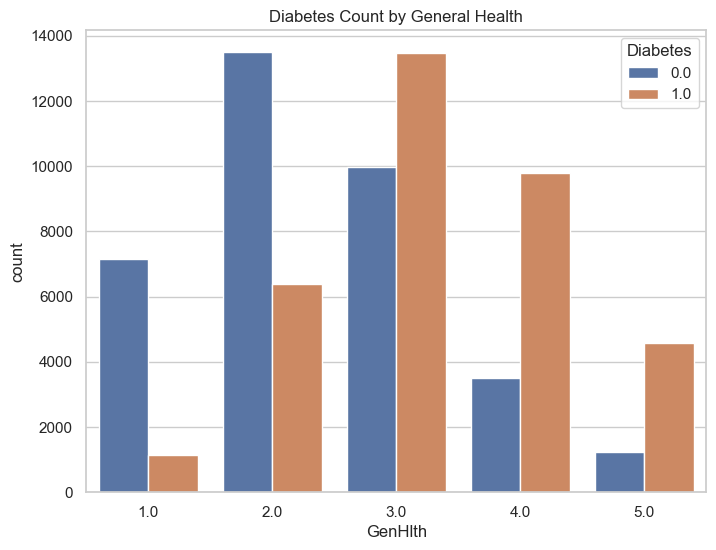

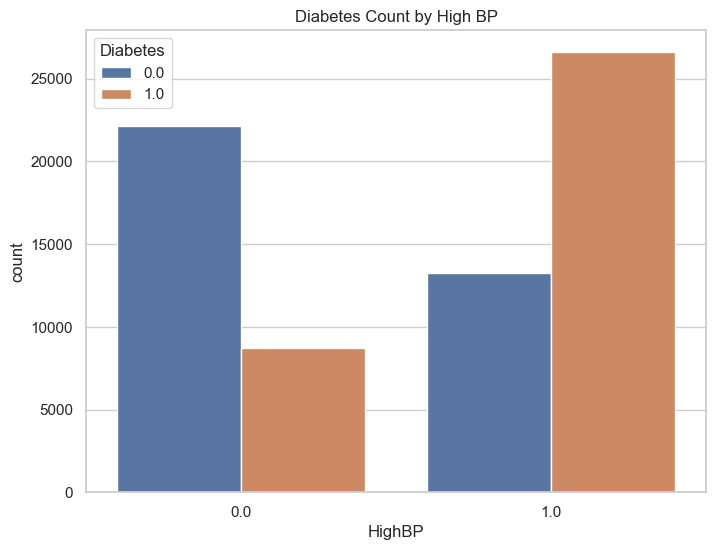

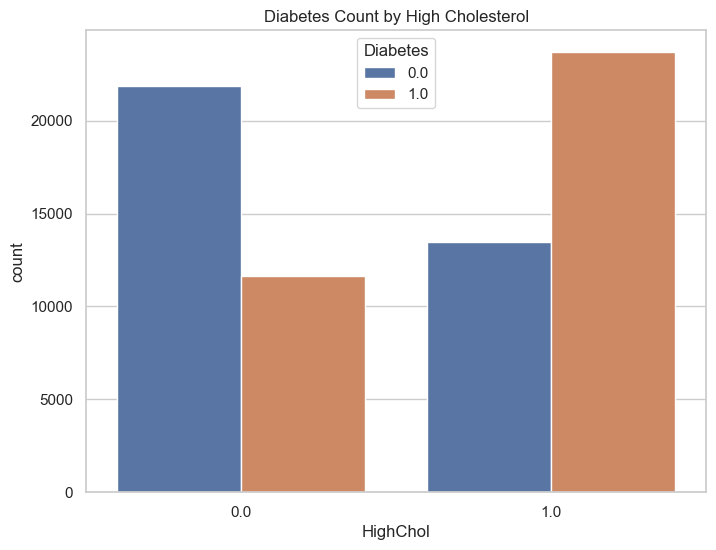

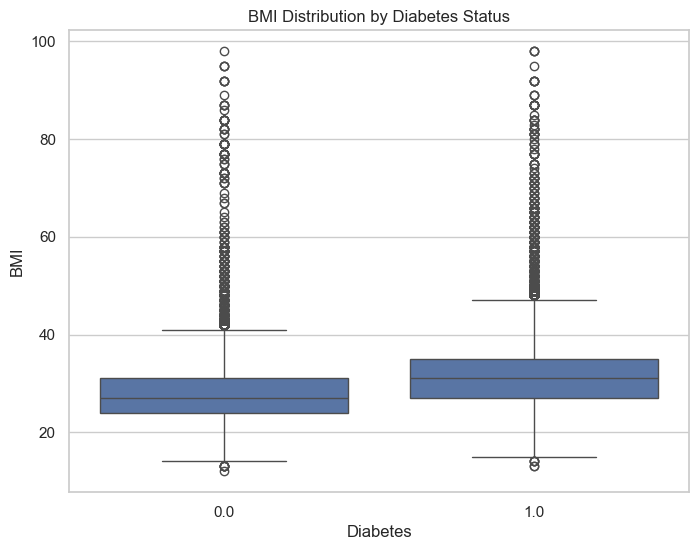

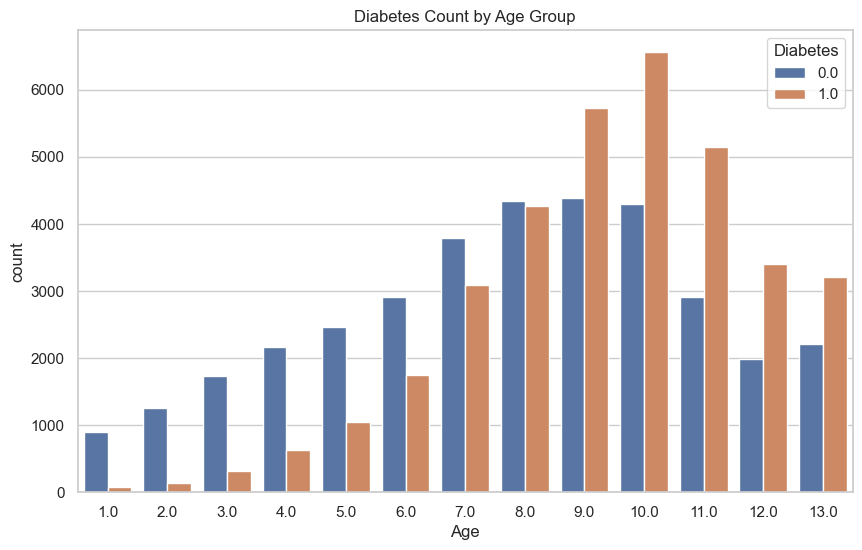

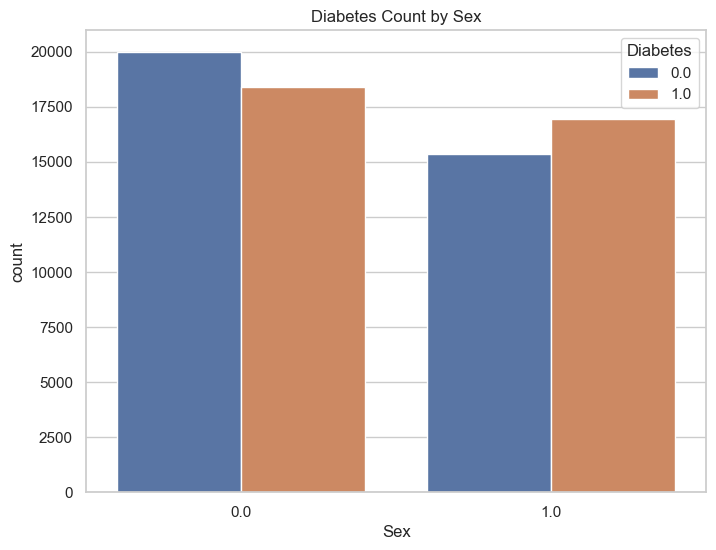

In [19]:
# Diabetes vs GenHlth
plt.figure(figsize=(8, 6))
sns.countplot(x='GenHlth', hue='Diabetes', data=df)
plt.title('Diabetes Count by General Health')
plt.show()

# Diabetes vs HighBP
plt.figure(figsize=(8, 6))
sns.countplot(x='HighBP', hue='Diabetes', data=df)
plt.title('Diabetes Count by High BP')
plt.show()

# Diabetes vs HighChol
plt.figure(figsize=(8, 6))
sns.countplot(x='HighChol', hue='Diabetes', data=df)
plt.title('Diabetes Count by High Cholesterol')
plt.show()

# Diabetes vs BMI (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Status')
plt.show()

# Diabetes vs Age
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Diabetes', data=df)
plt.title('Diabetes Count by Age Group')
plt.show()

# Diabetes vs Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Diabetes', data=df)
plt.title('Diabetes Count by Sex')
plt.show()

# Weather Dataset

In [20]:
df = pd.read_csv(f'{datasets_path}/weather.csv')

# Display basic information
print("First 5 rows:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe())

# Set plot style
sns.set(style="whitegrid")

First 5 rows:
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  

Info:

### Distribution of Target Variable 'Weather Type'

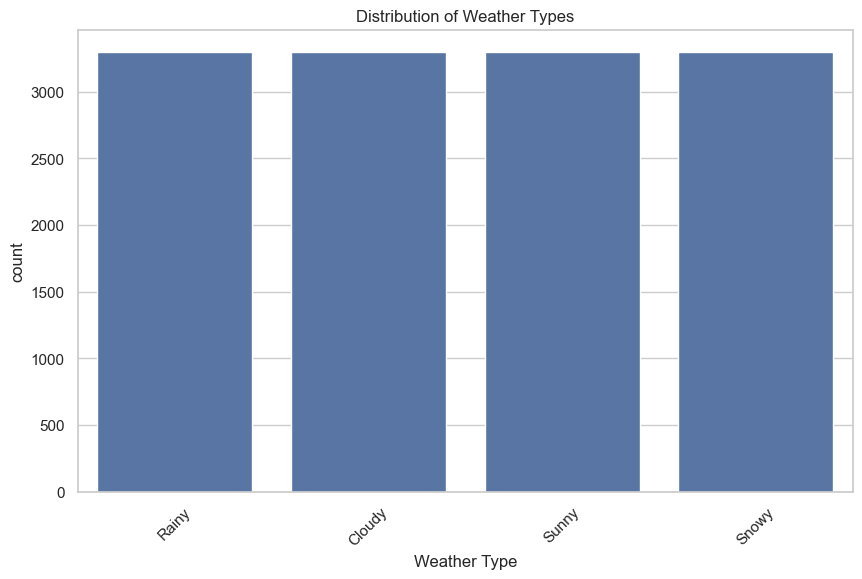

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather Type', order=df['Weather Type'].value_counts().index)
plt.title('Distribution of Weather Types')
plt.xticks(rotation=45)
plt.show()

### Correlation Heatmap (Numerical columns only)

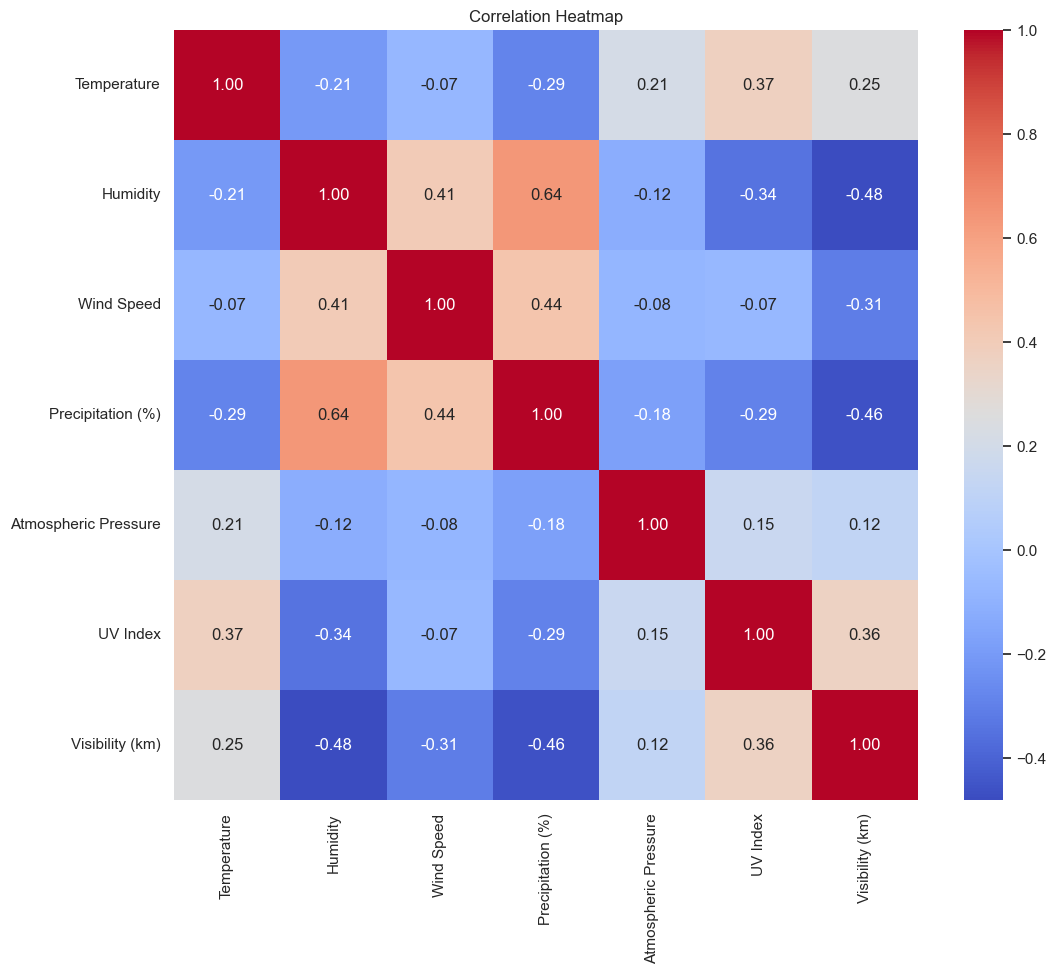

In [22]:
plt.figure(figsize=(12, 10))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Numerical Feature Distributions

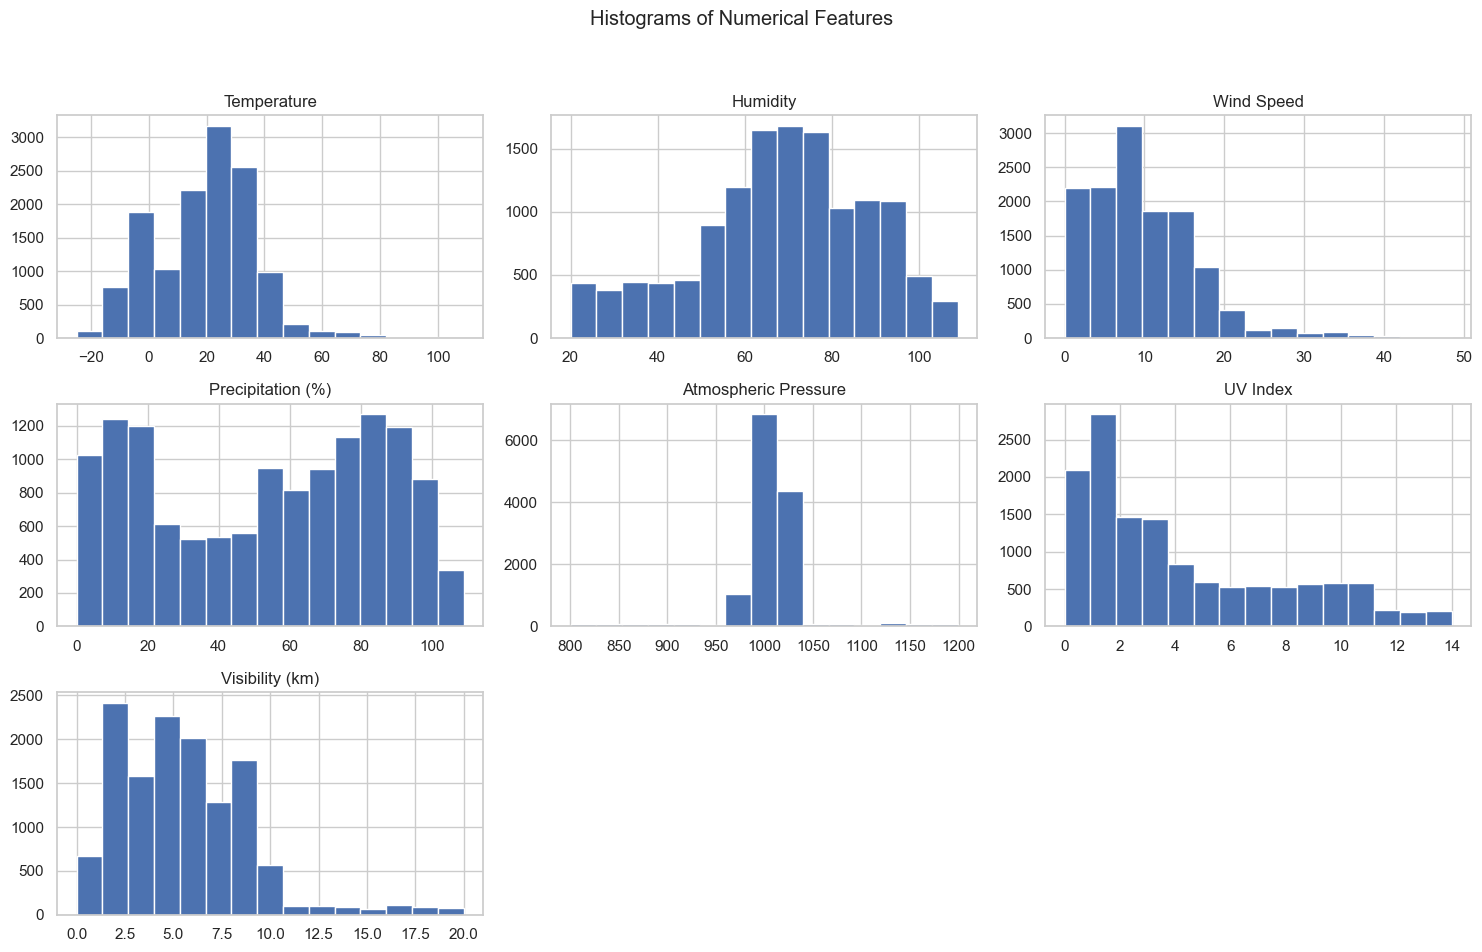

In [23]:
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Categorical Feature Distributions (excluding target)

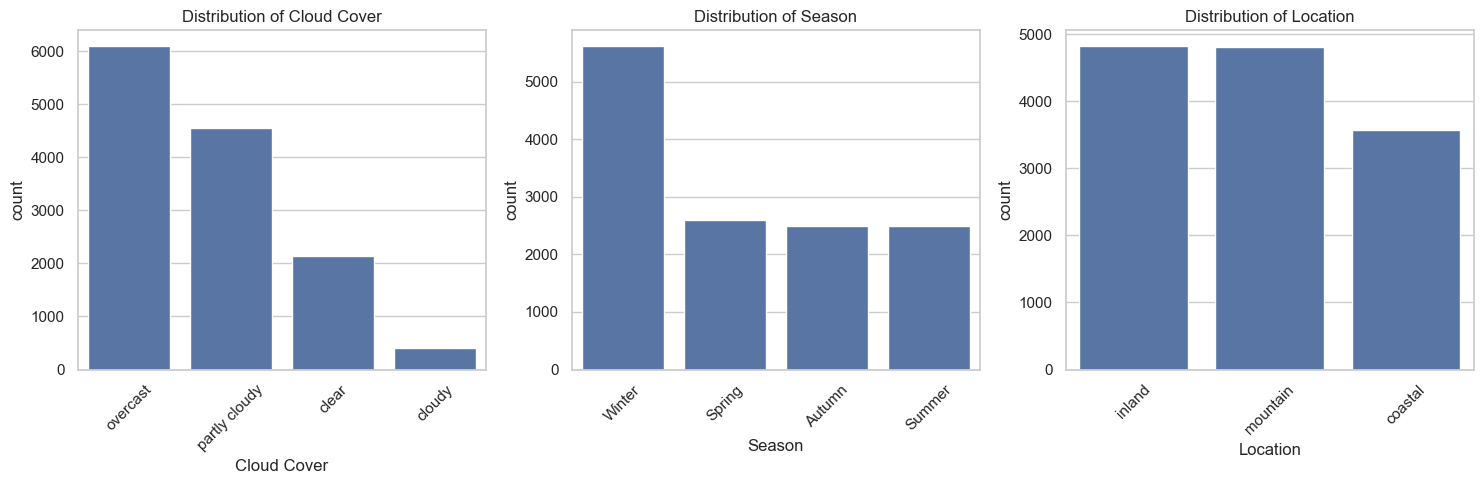

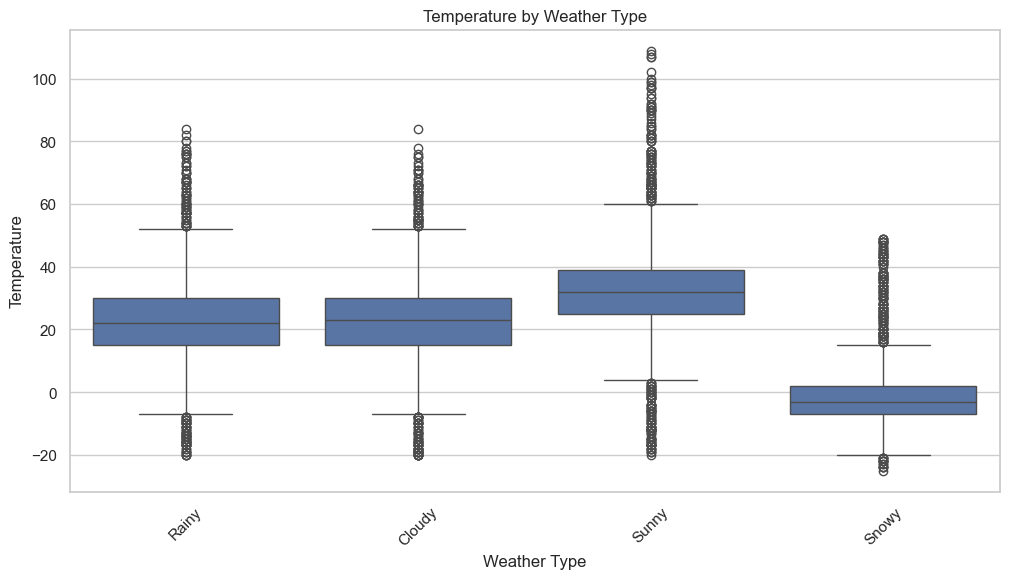

In [24]:
categorical_features = ['Cloud Cover', 'Season', 'Location']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplots of Temperature vs Weather Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Weather Type', y='Temperature')
plt.title('Temperature by Weather Type')
plt.xticks(rotation=45)
plt.show()

Run 'Main' for the model analysis